In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas datafra
iris= pd.read_csv(url, names=names)

In [3]:
iris.head(5)

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df=pd.read_csv(url)

In [7]:
df

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


# Exploratary data analysis

Text(0.5, 1.0, 'sepal length vs width')

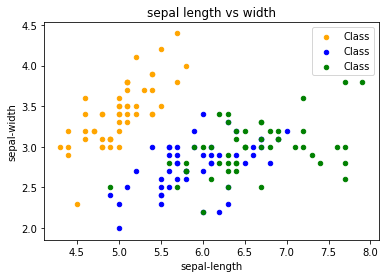

In [4]:
fig=iris[iris.Class=='Iris-setosa'].plot(kind='scatter',x='sepal-length',y='sepal-width',color='orange',label='Class')
iris[iris.Class=='Iris-versicolor'].plot(kind='scatter',x='sepal-length',y='sepal-width',color='blue',label='Class',ax=fig)
iris[iris.Class=='Iris-virginica'].plot(kind='scatter',x='sepal-length',y='sepal-width',color='green',label='Class',ax=fig)
fig.set_xlabel("sepal-length")
fig.set_ylabel("sepal-width")
fig.set_title("sepal length vs width")

In [5]:
iris['Class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Text(0.5, 1.0, 'petal length vs width')

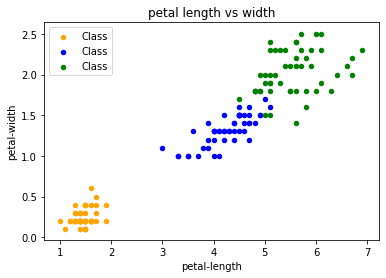

In [6]:
fig=iris[iris.Class=='Iris-setosa'].plot(kind='scatter',x='petal-length',y='petal-width',color='orange',label='Class')
iris[iris.Class=='Iris-versicolor'].plot(kind='scatter',x='petal-length',y='petal-width',color='blue',label='Class',ax=fig)
iris[iris.Class=='Iris-virginica'].plot(kind='scatter',x='petal-length',y='petal-width',color='green',label='Class',ax=fig)
fig.set_xlabel("petal-length")
fig.set_ylabel("petal-width")
fig.set_title("petal length vs width")

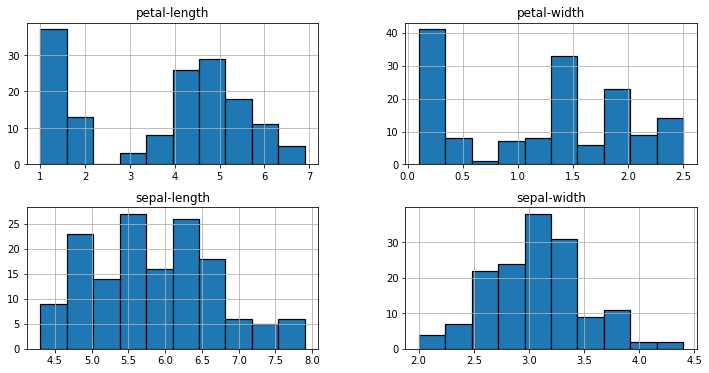

In [7]:
iris.hist(edgecolor='black',linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

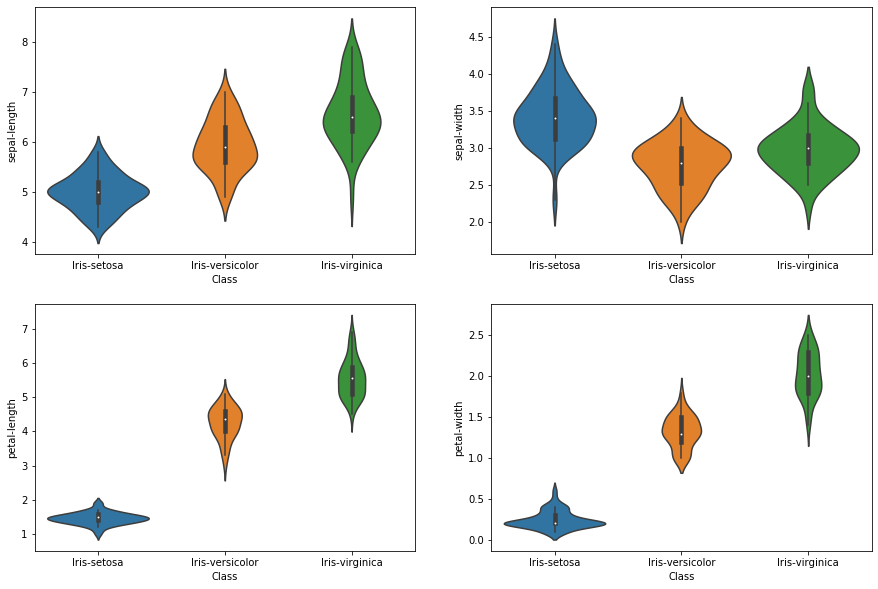

In [8]:
import seaborn as sns
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Class',y='sepal-length',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='Class',y='sepal-width',data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='Class',y='petal-length',data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='Class',y='petal-width',data=iris)


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

<function matplotlib.pyplot.show(*args, **kw)>

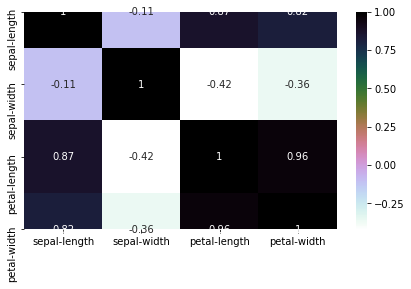

In [10]:
plt.figure(figsize=(7,4))
sns.heatmap(iris.corr(),annot=True,cmap='cubehelix_r')
plt.show

In [11]:
train,test=train_test_split(iris,test_size=0.3)
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [12]:
#sepal-length	sepal-width	petal-length	petal-width	Class
train_x=train[['sepal-length','sepal-width','petal-length','petal-width']]
test_x=test[['sepal-length','sepal-width','petal-length','petal-width']]
train_y=train.Class
test_y=test.Class

# support vector machine(svm)

In [13]:
model=svm.SVC()
model.fit(train_x,train_y)
prediction=model.predict(test_x)
print("the accurcy of svm is:",metrics.accuracy_score(prediction,test_y))

the accurcy of svm is: 0.9333333333333333


C:\Users\Win10\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [14]:
model=LogisticRegression()
model.fit(train_x,train_y)
prediction=model.predict(test_x)
print('the accuracy of the logisticregration is:',metrics.accuracy_score(prediction,test_y))

C:\Users\Win10\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Win10\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


the accuracy of the logisticregration is: 0.9777777777777777


In [15]:
model=KNeighborsClassifier(n_neighbors=3)
model.fit(train_x,train_y)
prediction=model.predict(test_x)
print("the accuracy of KNN model is:",metrics.accuracy_score(prediction,test_y))

the accuracy of KNN model is: 0.9333333333333333


# KNN for list of values

([<matplotlib.axis.XTick at 0x21869852088>,
 <a list of 9 Text xticklabel objects>)

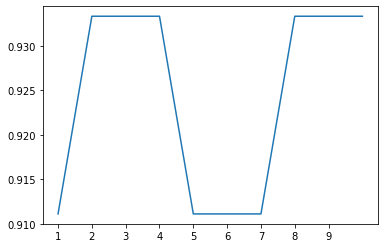

In [16]:
a_index=list(range(1,11))
a=pd.Series()
x=[1,2,3,4,5,6,7,8,9]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(train_x,train_y)
    prediction=model.predict(test_x)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_y)))
    
plt.plot(a_index,a)
plt.xticks(x)

In [17]:
#decision tree
model=DecisionTreeClassifier()
model.fit(train_x,train_y)
prediction=model.predict(test_x)
print("the accuracy value for decision tree is:",metrics.accuracy_score(prediction,test_y))

the accuracy value for decision tree is: 0.9555555555555556


In [18]:
iris.head(0)

,sepal-length,sepal-width,petal-length,petal-width,Class


In [19]:
petal=iris[['petal-length','petal-width','Class']]
sepal=iris[['sepal-length','sepal-width','Class']]

In [20]:
train_p,test_p=train_test_split(petal,test_size=0.3,random_state=0)
train_x_p=train_p[['petal-length','petal-width']]
train_y_p=train_p.Class
test_x_p=test_p[['petal-length','petal-width']]
test_y_p=test_p.Class



train_s,test_s=train_test_split(sepal,test_size=0.3,random_state=0)
train_x_s=train_s[['sepal-length','sepal-width']]
train_y_s=train_s.Class
test_x_s=test_s[['sepal-length','sepal-width']]
test_y_s=test_s.Class



In [21]:
model=svm.SVC()
model.fit(train_x_p,train_y_p)
prediction=model.predict(test_x_p)
print("the accuracy of svm using petal is:",metrics.accuracy_score(prediction,test_y_p))


model=svm.SVC()
model.fit(train_x_s,train_y_s)
prediction=model.predict(test_x_s)
print("the accuracy of svm using sepal is:",metrics.accuracy_score(prediction,test_y_s))

the accuracy of svm using petal is: 0.9777777777777777
the accuracy of svm using sepal is: 0.8


C:\Users\Win10\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Win10\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [24]:
#logistic regression
model=LogisticRegression()
model.fit(train_x_p,train_y_p)
preiction=model.predict(test_x_p)
print("the accuracy of logistic regretion using petal is:",metrics.accuracy_score(prediction,test_y_p))

model=LogisticRegression()
model.fit(train_x_s,train_y_s)
preiction=model.predict(test_x_s)
print("the accuracy of logistic regretion using sepal is:",metrics.accuracy_score(prediction,test_y_s))


the accuracy of logistic regretion using petal is: 0.8
the accuracy of logistic regretion using sepal is: 0.8


C:\Users\Win10\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Win10\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Win10\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Win10\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [33]:
##decition tree
model=DecisionTreeClassifier()
model.fit(train_x_p,train_y_p)
prediction=model.predict(test_x_p)
print("the accuracy of decision tree using petal is:",metrics.accuracy_score(prediction,test_y_p))


model=DecisionTreeClassifier()
model.fit(train_x_s,train_y_s)
prediction=model.predict(test_x_s)
print("the accuracy of decision tree using sepal is:",metrics.accuracy_score(prediction,test_y_s))

the accuracy of decision tree using petal is: 0.9555555555555556
the accuracy of decision tree using sepal is: 0.6444444444444445


In [35]:
### KNN
model=KNeighborsClassifier(n_neighbors=3)
model.fit(train_x_p,train_y_p)
prediction=model.predict(test_x_p)
print("the accuracy of decision tree using petal is:",metrics.accuracy_score(prediction,test_y_p))



model.fit(train_x_s,train_y_s)
prediction=model.predict(test_x_s)
print("the accuracy of decision tree using sepal is:",metrics.accuracy_score(prediction,test_y_s))

the accuracy of decision tree using petal is: 0.9777777777777777
the accuracy of decision tree using sepal is: 0.7333333333333333


In [38]:
from sklearn import linear_model
model=linear_model()
model.fit(train_x_p,train_y_p)
prediction=model.predict(test_x_p)
print("the accuracy of decision tree using petal is:",metrics.accuracy_score(prediction,test_y_p))



model.fit(train_x_s,train_y_s)
prediction=model.predict(test_x_s)
print("the accuracy of decision tree using sepal is:",metrics.accuracy_score(prediction,test_y_s))

